In [97]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [98]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [99]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


In [100]:
df

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12
...,...,...
3280,2016-12-27,1
3281,2016-12-28,-3
3282,2016-12-29,0
3283,2016-12-30,3


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [101]:
df_1 = df.copy()
df_1['year'] = df_1['Day'].apply(lambda x: x.year)
df_1

,Day,t,year
0,2008-01-01,0,2008
1,2008-01-02,-5,2008
2,2008-01-03,-11,2008
3,2008-01-04,-11,2008
4,2008-01-05,-12,2008
...,...,...,...
3280,2016-12-27,1,2016
3281,2016-12-28,-3,2016
3282,2016-12-29,0,2016
3283,2016-12-30,3,2016


In [102]:
df_1.groupby('year').mean().idxmin()['t']

2012

In [103]:
df_1.groupby('year').mean().idxmax()['t']

2015

**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [110]:
df_2 = df_1.copy()

In [111]:
df_2['month'] = df_2['Day'].apply(lambda x: x.month)

In [112]:
df_2['t+'] = df_2['t'].apply(lambda x: int(x >= 0))

In [113]:
df_2

,Day,t,year,month,t+
0,2008-01-01,0,2008,1,1
1,2008-01-02,-5,2008,1,0
2,2008-01-03,-11,2008,1,0
3,2008-01-04,-11,2008,1,0
4,2008-01-05,-12,2008,1,0
...,...,...,...,...,...
3280,2016-12-27,1,2016,12,1
3281,2016-12-28,-3,2016,12,0
3282,2016-12-29,0,2016,12,1
3283,2016-12-30,3,2016,12,1


In [114]:
df_2_y = df_2.loc[(df_2['month'] == 1)].groupby(['year']).sum()
df_2_y

,t,month,t+
year,,,
2008,-50,31,19
2009,-108,31,11
2010,-354,31,0
2011,-171,31,5
2012,-146,31,6
2013,-183,31,5
2014,-207,31,8
2015,-70,31,14
2016,-314,31,5


In [115]:
df_2_y.idxmax()['t+']

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [118]:
df_3 = df_1.copy()

In [121]:
df_3['month'] = df_3['Day'].apply(lambda x: x.month)

In [123]:
df_3

,Day,t,year,month
0,2008-01-01,0,2008,1
1,2008-01-02,-5,2008,1
2,2008-01-03,-11,2008,1
3,2008-01-04,-11,2008,1
4,2008-01-05,-12,2008,1
...,...,...,...,...
3280,2016-12-27,1,2016,12
3281,2016-12-28,-3,2016,12
3282,2016-12-29,0,2016,12
3283,2016-12-30,3,2016,12


In [127]:
df_3_y = df_3.loc[(df_2['month'] == 6) | (df_2['month'] == 7) | (df_2['month'] == 8)].groupby(['year']).mean()
df_3_y

,t,month
year,,
2008,18.119565,7.010870
2009,18.728261,7.010870
2010,22.119565,7.010870
2011,21.318681,7.010989
2012,19.086957,7.010870
2013,21.543478,7.010870
2014,20.706522,7.010870
2015,19.032609,7.010870
2016,19.326087,7.010870


In [129]:
df_3_y.idxmin()['t']

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [146]:
df_4 = df.copy()
df_4  

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12
...,...,...
3280,2016-12-27,1
3281,2016-12-28,-3
3282,2016-12-29,0
3283,2016-12-30,3


In [154]:
df_4['t_shift'] = df_4.t.shift(1)
df_4

,Day,t,t_shift,t_sum
0,2008-01-01,0,NaN,-5.0
1,2008-01-02,-5,0.0,-16.0
2,2008-01-03,-11,-5.0,-22.0
3,2008-01-04,-11,-11.0,-23.0
4,2008-01-05,-12,-11.0,-26.0
...,...,...,...,...
3280,2016-12-27,1,5.0,-2.0
3281,2016-12-28,-3,1.0,-3.0
3282,2016-12-29,0,-3.0,3.0
3283,2016-12-30,3,0.0,7.0


In [168]:
df_4['t_sum'] = abs(df_4.t - df_4.t_shift)
df_4

,Day,t,t_shift,t_sum
0,2008-01-01,0,NaN,NaN
1,2008-01-02,-5,0.0,5.0
2,2008-01-03,-11,-5.0,6.0
3,2008-01-04,-11,-11.0,0.0
4,2008-01-05,-12,-11.0,1.0
...,...,...,...,...
3280,2016-12-27,1,5.0,4.0
3281,2016-12-28,-3,1.0,4.0
3282,2016-12-29,0,-3.0,3.0
3283,2016-12-30,3,0.0,3.0


In [185]:
df_4.iloc[df_4['t_sum'].idxmax()]['Day']

Timestamp('2014-05-27 00:00:00')

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

In [191]:
df_5 = df_1.copy()
df_5

,Day,t,year
0,2008-01-01,0,2008
1,2008-01-02,-5,2008
2,2008-01-03,-11,2008
3,2008-01-04,-11,2008
4,2008-01-05,-12,2008
...,...,...,...
3280,2016-12-27,1,2016
3281,2016-12-28,-3,2016
3282,2016-12-29,0,2016
3283,2016-12-30,3,2016


In [197]:
df_5_y = df_5.groupby('year').mean()
df_5_y

,t
year,
2008,8.545205
2009,7.610959
2010,7.117808
2011,8.337912
2012,6.980822
2013,8.728767
2014,8.931507
2015,9.079452
2016,7.907104


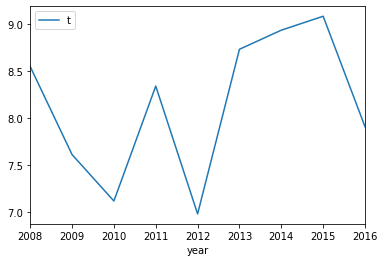

In [198]:
%matplotlib inline
df_5_y.plot()